In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import sklearn
import scipy
import gzip

import  csv
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.integrate import simps
from numpy import trapz

#To use mpld3, in anaconda terminal "pip install mpld3"
import mpld3
mpld3.enable_notebook()
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash
head -76 "Lysozyme_Concentration_Curve_Trehalose_Adonitol_Arabitol_40min _A450_25C_031019_v012_.csv" |tail -49 >temp6

In [3]:
%%bash
head -42 temp6> temp5

In [4]:
%%bash
cut  -d "," -f 3- temp5 > temp3

In [5]:
%%bash
tr -cd '[:print:][:cntrl:]'  < temp3 > test3.csv

In [6]:
raw_data=pd.read_csv("test3.csv", index_col=False )

In [ ]:
raw_data.info()

In [8]:
raw_data.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0:00:00,25.5,0.039,0.037,0.034,0.576,0.620,0.598,0.399,0.435,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
1,0:01:00,25.5,0.039,0.037,0.033,0.591,0.606,0.587,0.387,0.390,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
2,0:02:00,25.5,0.039,0.037,0.033,0.578,0.604,0.592,0.407,0.366,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
3,0:03:00,25.5,0.039,0.037,0.033,0.588,0.599,0.601,0.367,0.325,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
4,0:04:00,25.5,0.039,0.036,0.033,0.599,0.595,0.601,0.336,0.307,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064


In [9]:
#remove NAN
raw_data2=raw_data.dropna(axis=1)

In [10]:
raw_data2.describe()

,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,Pos Ctrl.2,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
count,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000,4.100000e+01,4.100000e+01,4.100000e+01
mean,25.502439,3.900000e-02,0.036098,0.033805,0.611244,0.602049,0.608976,0.162512,0.152463,0.151634,...,0.051049,5.300000e-02,5.300000e-02,5.300000e-02,0.053878,0.052415,0.055,5.400000e-02,5.600000e-02,6.400000e-02
std,0.015617,2.107528e-17,0.000300,0.000401,0.010521,0.005422,0.008141,0.099414,0.096253,0.095859,...,0.000218,2.107528e-17,2.107528e-17,2.107528e-17,0.000331,0.000499,0.000,1.405019e-17,4.215057e-17,4.215057e-17
min,25.500000,3.900000e-02,0.036000,0.033000,0.576000,0.595000,0.587000,0.083000,0.079000,0.078000,...,0.051000,5.300000e-02,5.300000e-02,5.300000e-02,0.053000,0.052000,0.055,5.400000e-02,5.600000e-02,6.400000e-02
25%,25.500000,3.900000e-02,0.036000,0.034000,0.610000,0.597000,0.602000,0.092000,0.086000,0.085000,...,0.051000,5.300000e-02,5.300000e-02,5.300000e-02,0.054000,0.052000,0.055,5.400000e-02,5.600000e-02,6.400000e-02
50%,25.500000,3.900000e-02,0.036000,0.034000,0.615000,0.602000,0.609000,0.114000,0.105000,0.104000,...,0.051000,5.300000e-02,5.300000e-02,5.300000e-02,0.054000,0.052000,0.055,5.400000e-02,5.600000e-02,6.400000e-02
75%,25.500000,3.900000e-02,0.036000,0.034000,0.618000,0.606000,0.617000,0.200000,0.184000,0.184000,...,0.051000,5.300000e-02,5.300000e-02,5.300000e-02,0.054000,0.053000,0.055,5.400000e-02,5.600000e-02,6.400000e-02
max,25.600000,3.900000e-02,0.037000,0.034000,0.620000,0.620000,0.620000,0.407000,0.435000,0.423000,...,0.052000,5.300000e-02,5.300000e-02,5.300000e-02,0.054000,0.053000,0.055,5.400000e-02,5.600000e-02,6.400000e-02


In [11]:
raw_data2.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0:00:00,25.5,0.039,0.037,0.034,0.576,0.620,0.598,0.399,0.435,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
1,0:01:00,25.5,0.039,0.037,0.033,0.591,0.606,0.587,0.387,0.390,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
2,0:02:00,25.5,0.039,0.037,0.033,0.578,0.604,0.592,0.407,0.366,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
3,0:03:00,25.5,0.039,0.037,0.033,0.588,0.599,0.601,0.367,0.325,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064
4,0:04:00,25.5,0.039,0.036,0.033,0.599,0.595,0.601,0.336,0.307,...,0.051,0.053,0.053,0.053,0.054,0.052,0.055,0.054,0.056,0.064


In [12]:
colnames=list(raw_data2)

In [13]:
df_posC_mean=raw_data2.loc[:,colnames[8:11]].mean(axis=1)
df_posC_std=raw_data2.loc[:,colnames[8:11]].std(axis=1)

In [14]:
i=3
df1=raw_data2.loc[:,colnames[35+(i-1)*3:35+i*3]]
df1.head()

,Adonitol (1E-1 mM),Adonitol (1E-1 mM).1,Adonitol (1E-1 mM).2
0,0.453,0.363,0.483
1,0.404,0.425,0.446
2,0.375,0.384,0.374
3,0.339,0.350,0.341
4,0.306,0.311,0.315


In [15]:
df1['Adonitol_std']=df1.std(axis=1)

In [16]:
df=pd.concat([df_posC_mean,df_posC_std, df1], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
0                        41 non-null float64
1                        41 non-null float64
 Adonitol (1E-1 mM)      41 non-null float64
 Adonitol (1E-1 mM).1    41 non-null float64
 Adonitol (1E-1 mM).2    41 non-null float64
Adonitol_std             41 non-null float64
dtypes: float64(6)
memory usage: 2.0 KB


In [18]:
df.head()

,0,1,Adonitol (1E-1 mM),Adonitol (1E-1 mM).1,Adonitol (1E-1 mM).2,Adonitol_std
0,0.419,0.018330,0.453,0.363,0.483,0.062450
1,0.379,0.016523,0.404,0.425,0.446,0.021000
2,0.383,0.021378,0.375,0.384,0.374,0.005508
3,0.343,0.021633,0.339,0.350,0.341,0.005859
4,0.321,0.014526,0.306,0.311,0.315,0.004509


In [19]:
df.columns=['Positive Ctrl','Pos Ctrl_std' ,'Adonitol (1E-1 mM)','Adonitol (1E-1 mM).1','Adonitol (1E-1 mM).2','Adonitol_std']

In [20]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [21]:
df_column2=['Positive Ctrl', 'Adonitol (1E-1 mM)']

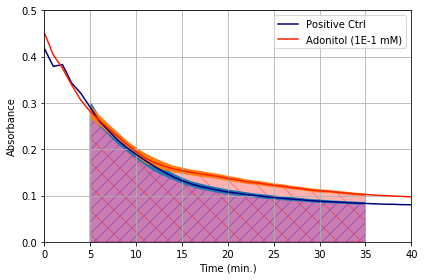

In [26]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES = 9
values = range(NCURVES)
fig = plt.figure()

jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

lines = []
num=0
column='Positive Ctrl'
colorVal = scalarMap.to_rgba(values[num])
colorText = ( '(%s)'%(column))
#sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);
retLine = plt.plot(df[column],color=colorVal,label=column)
lines.append(retLine)
column='Adonitol (1E-1 mM)'
num+=7
colorVal = scalarMap.to_rgba(values[num])
colorText = ( '(%s)'%(column))
retLine = plt.plot(df[column], color=colorVal,label=column)
lines.append(retLine)

ax = plt.gca() 
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade 
x1 = l1.get_xydata()[5:36,0]
y1 = l1.get_xydata()[5:36,1]
x2 = l2.get_xydata()[5:36,0]
y2 = l2.get_xydata()[5:36,1]
ax.fill_between(x1,y1, color="blue", alpha=0.3, hatch="//")
ax.fill_between(x2,y2, color="red", alpha=0.3, hatch="\\")

#add error zone
error1=df['Pos Ctrl_std'][5:36]
ax.fill_between(x1, y1-error1, y1+error1)
error2=df['Pos Ctrl_std'][5:36]
ax.fill_between(x2, y2-error2, y2+error2)

         
plt.legend(df_column2, loc='best')
plt.ylabel('Absorbance')
plt.xlabel('Time (min.)')
plt.ylim([0,0.5])
plt.xlim([0,40])
plt.grid()
plt.tight_layout()
plt.savefig('AUC_explanationsnoBump2_errorbar3.png')
plt.show()
